# Importing Data to Google Colab

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"stanleydil","key":"23507a66288dffebae263619215db2d4"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d joosthazelzet/lego-brick-images

lego-brick-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#check to macke sure you are in the right folder

In [0]:
!ls
!unzip lego-brick-images.zip

'Collada models'  'kaggle (1).json'  'LEGO brick images v1'   sample_data
 dataset	   kaggle.json	      lego-brick-images.zip   validation.txt
Archive:  lego-brick-images.zip
replace Collada models/14719 flat tile corner 2x2.dae? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


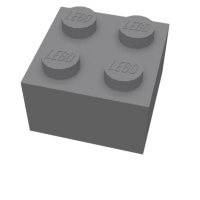

In [0]:
from IPython.display import Image
#If everything works, a lego brick should display here!
Image(filename='/content/LEGO brick images v1/3003 Brick 2x2/0001.png') 


# Neural Networks with Keras


Setting Parameters for training and validation data generation

Generating Train Data

In [0]:
from keras.preprocessing.image import ImageDataGenerator

def generate_data(train_data_dir,image_width, batch_size, aug):
    #Create the image data generator 
    train_datagen = ImageDataGenerator(
        ##
        ##
        validation_split=aug) 
    
    #Generate Training data from images
    train_generator = train_datagen.flow_from_directory(
        ##
        ##
        subset='training',
        shuffle=True) 
    
    #Generate Validation data from images
    validation_generator = train_datagen.flow_from_directory(
        ##
        ##
        subset='validation',
        shuffle=False)
    
    return train_generator, validation_generator

Setting up the layers for our Neural network

In [0]:
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D


def create_alexnet():

    model = keras.models.Sequential()
    
    #First Convolutional Input Layer
  

    #2nd Con
    

    # 3rd Convolutional Layer

    # 4th Convolutional Layer

    # 5th Convolutional Layer

    #Flatten matrix to vector and then passing to the Fully Connected Layer

    # 1st Fully Connected (Dense) Layer
    # 2nd Fully Connected Layer
    # 3rd Fully Connected Layer
    # Output Layer Softmax Layer
    return model


In [0]:
train_data_dir = '/content/LEGO brick images v1/'
image_width = 224
batch_size =  32
aug = 0.2

In [0]:
#Removing tensorflow deprecated warnings so we can read outputs a bit better
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Training Model

In [0]:
 train_generator, validation_generator = generate_data(train_data_dir,image_width,64,aug)

#Use create_alexnet() function to create network layer for AlexNet
alexnet = create_alexnet()

alexnet.summary()

Found 5104 images belonging to 16 classes.
Found 1275 images belonging to 16 classes.
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 4, 4, 384)         1327488   
_________________________________

In [0]:
#Use SGD with custom settings, experiment with some optimizers (some work, and some don't)
from keras.optimizers import SGD
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


#Compile model with a categorical cross entropy loss and adam optimizer
alexnet.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

#Fit model and generate Data
history = alexnet.fit_generator(
                                ##
                                ##
                                ##
                                )

In [0]:
#Plotting Training and Validation Accuracy/Loss

import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

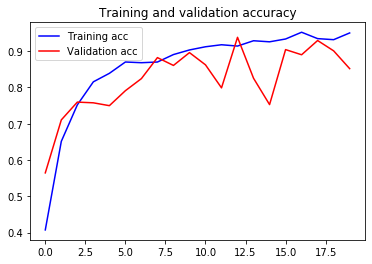

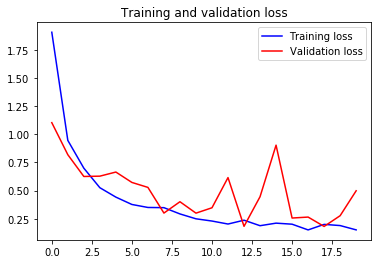

In [0]:
plot_history(history)

# Transfer Learning

In [0]:
from keras.layers import Dense, Flatten, Dropout
from keras import layers
from keras.applications.vgg16 import VGG16


def create_vgg():
    
    #Load VGG with imagenet weights
    vgg = VGG16(###)

    #Freeze all layers of the original VGG model except for last 4

    # Create the model
    model = keras.models.Sequential()

    # Add the vgg convolutional base model
    model.add(vgg)
    
    # Add new layers
    # Flatten output matrix

    # Fully Connected Layer with 1024 nodes and ReLU activation

    # Optional: Add dropout of 0.2
    model.add(Dropout(0.2))

    #Add dense layer with 16 ourputs and softmax activation

    return model
    

In [0]:
#create VGG16 Model
vgg = create_vgg()

#See summary of VGG16 
vgg.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_19 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_69 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 16)                16400     
Total params: 40,422,224
Trainable params: 32,786,960
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
from keras import optimizers

#Compile VGG with RMSprop optimizer 
vgg.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

#Retrain 
history = vgg.fit_generator(
                                ###
                                ###
                                ###
                            )

Epoch 1/20
32/32 [==============================] - 53s 2s/step - loss: 1.8161 - acc: 0.4267 - val_loss: 0.9566 - val_acc: 0.6309
Epoch 2/20
32/32 [==============================] - 45s 1s/step - loss: 0.8008 - acc: 0.7070 - val_loss: 0.6746 - val_acc: 0.7615
Epoch 3/20
32/32 [==============================] - 44s 1s/step - loss: 0.5430 - acc: 0.8018 - val_loss: 0.7910 - val_acc: 0.7283
Epoch 4/20
32/32 [==============================] - 45s 1s/step - loss: 0.3932 - acc: 0.8574 - val_loss: 0.4757 - val_acc: 0.8307
Epoch 5/20
32/32 [==============================] - 45s 1s/step - loss: 0.3548 - acc: 0.8641 - val_loss: 0.4399 - val_acc: 0.8518
Epoch 6/20
32/32 [==============================] - 44s 1s/step - loss: 0.2921 - acc: 0.8862 - val_loss: 0.5677 - val_acc: 0.7988
Epoch 7/20
32/32 [==============================] - 44s 1s/step - loss: 0.2385 - acc: 0.9107 - val_loss: 0.3499 - val_acc: 0.8567
Epoch 8/20
32/32 [==============================] - 43s 1s/step - loss: 0.2005 - acc: 0.92

In [0]:
# Classifying some images 